<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Histograms, Binnings, and Density](04.05-Histograms-and-Binnings.ipynb) | [Contents](Index.ipynb) | [Customizing Colorbars](04.07-Customizing-Colorbars.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.06-Customizing-Legends.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# 自訂圖表的圖例

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

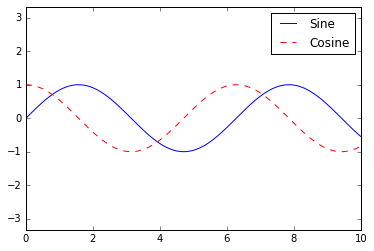

In [9]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots() # 建立圖的畫布
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
ax.legend(); # 建立圖例plt.legend()

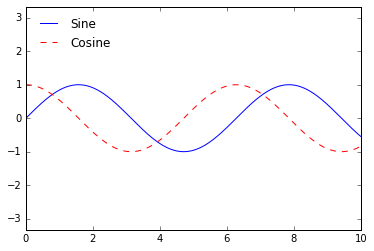

In [12]:
# 指定位置，關閉格線
ax.legend(loc='upper left', frameon=False)
fig

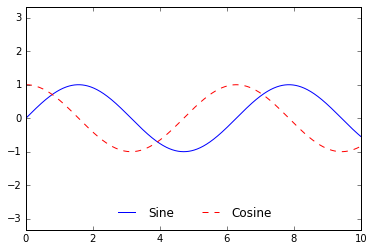

In [16]:
# ncol參數指定圖例的欄位數
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

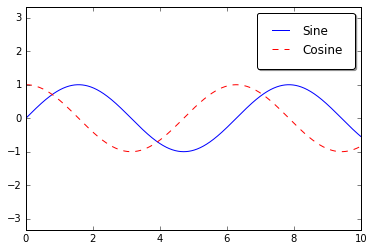

In [22]:
# 使用圓角矩形(fancybox)或是加上陰影、改變框的透明度、或在文字周圍墊上一些空間
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

## 選取圖例所要使用的元素

``plt.plot()``命令可以一次建立許多線條，而且傳回已建立好的線條執行實例list。

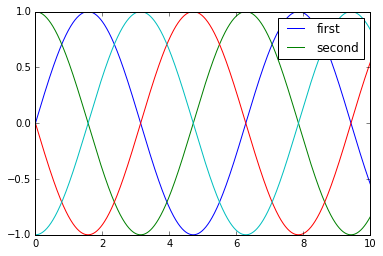

In [29]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

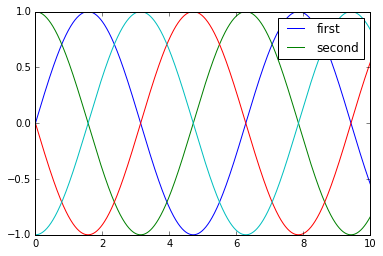

In [30]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

## 在圖例中的資料點大小



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  


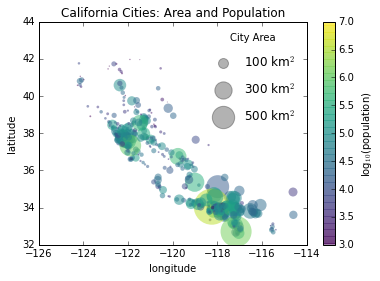

In [33]:
# 使用點的大小來表示加州各城的人口

import pandas as pd
cities = pd.read_csv('/content/california_cities.csv')

# 取出有興趣的資料
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# 使用大小和顏色但是沒有標籤，畫上這些資料點
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# 建立圖例
# 畫上一個有我們想要的大小以及標籤的空串列
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

圖例可以參考圖表上的物件，如果想要顯示特定形狀就要把它畫上去。因為想要的物件(灰色的圓形)並不在圖表上，所以要畫上一個空的串列來假裝它們。圖例只會列出那些具有標籤的圖表元素。

藉由畫上空的list，建立具有標籤的圖表，物件就可以被挑選到圖例中，如此圖例中就會告訴我們這些有用的資料。這個策略在建立更複雜的視覺化圖形時會非常有用。



## 多重圖例

Matplotlib沒有簡單的方法可以建立多個圖例，整個圖表只能建立一個圖例。
如果打算使用``plt.legend()``或``ax.legend()``建立第二個圖例，會直接把第一個覆蓋掉。可以從無到有建立一個新的圖例artist，然後使用低階的``ax.add_artist()``方法手動的加上第二個artist到這個圖表中

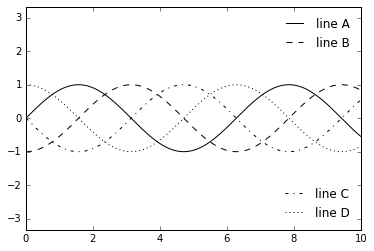

In [34]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# 指定第一個圖例的線條和標籤
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# 建立第2個圖例，然後手動的加入artist
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

<!--NAVIGATION-->
< [Histograms, Binnings, and Density](04.05-Histograms-and-Binnings.ipynb) | [Contents](Index.ipynb) | [Customizing Colorbars](04.07-Customizing-Colorbars.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.06-Customizing-Legends.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
